# Summary 

This worksheet focuses on Exploratory data analyis .

Some of the exploration included followining:
distributions examinination to identiy outliers.
        * Sale Price( target variable)
        * Numerical features
        * ordinal features
-  Sale price co-relation with respect to numerical features

Following Additional EDA was done to explore some of the
intresting features and their association with the target variable Sale price visually.

*  What does a typical average home look like in Ames Iowa in terms of specification and sale price
*  Trend of average sale prices
*  Do homes in certain neighborhoods priced differently than others? 
*  Do zones have any impact on price of a home
*  Do newer houses built recently or remodeled are priced at higher rate ?

At high level  from EDA , it seems we have several features that have  high co-relation with the Sale price
which will be helpful in buiding a good model that could predict prices.

Please see the next file where we- will convert the categorical varibles to numerical and incorporate them in to the model.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import  the cleaned  data sets 
for  cleaning details please see  juyter notebook - 01.cleaning.

In [62]:
train_cleaned_df = pd.read_csv("./submission/train_cleaned.csv")
test_cleaned_df = pd.read_csv("./submission/test_cleaned.csv")
train_cleaned_df.head(1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,ord_Lot Shape,Land Contour,ord_Utilities,Lot Config,...,Screen Porch,Pool Area,ord_Pool QC,ord_Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,85.505051,13517,Pave,N_A,IR1,Lvl,AllPub,CulDSac,...,0,0,N_A,N_A,N_A,0,3,2010,WD,130500


#  Summary  Statistics

###  Sale price . 

In [63]:
train_cleaned_df['SalePrice'].describe()

count      2043.000000
mean     181471.524229
std       79218.251534
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

** Average Home price  is 188k , ranges beween as low as 12789$ to 611657$. That is centrainly a huge price range .**

###  Numerical feature columns

In [64]:
train_cleaned_df[sorted(train_cleaned_df.select_dtypes(include="number").columns)].agg(['count','min','max','mean']).T

,count,min,max,mean
1st Flr SF,2043.0,334.0,5095.0,1163.871268
2nd Flr SF,2043.0,0.0,1862.0,329.842389
3Ssn Porch,2043.0,0.0,508.0,2.601566
Bedroom AbvGr,2043.0,0.0,8.0,2.844347
Bsmt Full Bath,2043.0,0.0,3.0,0.427313
Bsmt Half Bath,2043.0,0.0,2.0,0.062653
Bsmt Unf SF,2043.0,0.0,2336.0,567.960842
BsmtFin SF 1,2043.0,0.0,5644.0,441.832599
BsmtFin SF 2,2043.0,0.0,1474.0,47.552129
Enclosed Porch,2043.0,0.0,432.0,22.532061


**For most part  the min , max  and average values look reasonable.**

###   Distribution for Ordinal features

In [65]:
for col in train_cleaned_df.columns[train_cleaned_df.columns.str.startswith('ord')]:
    print(f"{col}:\n{train_cleaned_df[col].value_counts()}")
    print(f"---------------------------------")

ord_Lot Shape:
Reg    1293
IR1     688
IR2      53
IR3       9
Name: ord_Lot Shape, dtype: int64
---------------------------------
ord_Utilities:
AllPub    2043
Name: ord_Utilities, dtype: int64
---------------------------------
ord_Land Slope:
Gtl    1948
Mod      88
Sev       7
Name: ord_Land Slope, dtype: int64
---------------------------------
ord_Overall Qual:
5     561
6     504
7     430
8     249
4     158
9      77
3      29
10     23
2       8
1       4
Name: ord_Overall Qual, dtype: int64
---------------------------------
ord_Overall Cond:
5    1165
6     366
7     268
8     101
4      69
3      35
9      29
2       6
1       4
Name: ord_Overall Cond, dtype: int64
---------------------------------
ord_Exter Qual:
TA    1242
Gd     695
Ex      81
Fa      25
Name: ord_Exter Qual, dtype: int64
---------------------------------
ord_Exter Cond:
TA    1771
Gd     215
Fa      48
Ex       7
Po       2
Name: ord_Exter Cond, dtype: int64
---------------------------------
ord_Bsmt Qual

**Looking at the distributions -  following things stand out
More than 50 % houses have regular lot size, around 25% are slightly irregular.
99% houses have all utilities, electrical and heating
95% of the houses have gentle slope with a very few house with severe slope
65% have no basement exposure
90% homes have Paved Drive
70% homes are  in ‘Residential Low Density’  zone and  another 10%  make up in ‘RM’**


In [66]:
# deleting the two homes with no sew, not good representaion
train_cleaned_df =train_cleaned_df[train_cleaned_df['ord_Utilities'] == 'AllPub']

# Sale price co-relation with the numerical features


Text(0.5, 808.9999999999948, 'Sale Price in USD')

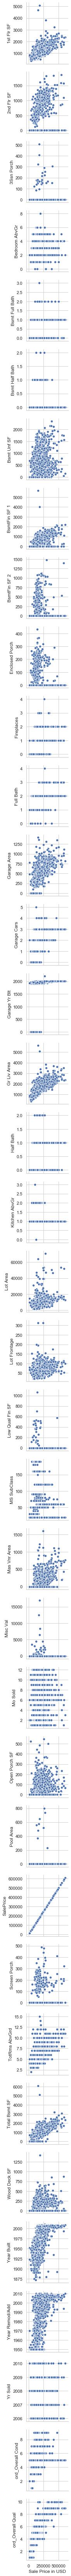

In [67]:
sns.pairplot(train_cleaned_df,x_vars =['SalePrice'],y_vars =sorted(train_cleaned_df.select_dtypes(include ="number").columns))
plt.xlabel('Sale Price in USD')

**The numercical  features that measures area of the house in some way like  basement area, garage areas, total size of the house 1st and 2nd floor area are highly co-related with sale price as  you'd expect. **

# Create features  that might be impact sale price 

In [68]:
def create_new_features(df):
    
   df['feature_tot_squ_feet'] = df['Total Bsmt SF']+df['1st Flr SF']+df['2nd Flr SF']
   df['f_has_pool']=df['Pool Area'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_wooden_deck'] = df['Wood Deck SF'].apply(lambda x :1 if(x >0) else 0)

   df['f_has_enclosed_porch']=df['Enclosed Porch'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_open_porch']=df['Open Porch SF'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_screen_porch']=df['Screen Porch'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_3Ssn_porch']=df['3Ssn Porch'].apply(lambda x :1 if(x >0) else 0)
   df['f_tot_porches']=df['f_has_enclosed_porch']

   affluent_neighborhoods =['Somerst','StoneBr','NridgHt','Veenker','NoRidge','GrnHill']
   df['f_in_affluent_neighborhood'] = df['Neighborhood'].apply(lambda x:  1 if (x in affluent_neighborhoods) else 0)

   df['f_new_or_remodeled'] = np.where((df['Year Built'] >1990) | (df['Year Remod/Add'] >1990), 1,0)

create_new_features(train_cleaned_df)
create_new_features(test_cleaned_df)

###  The co-relation map depicts the   co-relation between sale price and the numerical features in data set.

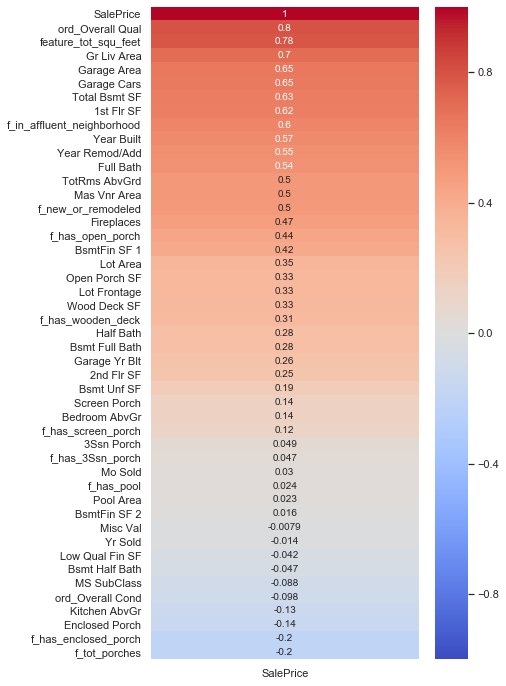

In [69]:
 apps_core = train_cleaned_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
 plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
 sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm',annot=True)

### What are specs and price of a  typical home in  Ames Iowa 

In [70]:
np.round(train_cleaned_df['Lot Area'].mean()), \
np.round((train_cleaned_df['Total Bsmt SF']+train_cleaned_df['1st Flr SF']+train_cleaned_df['2nd Flr SF']).mean()),\

(9912.0, 2551.0)

In [71]:
print (f"An Average home in Ames Iowa is priced at ${np.round(train_cleaned_df['SalePrice'].mean())}")
np.round(train_cleaned_df['Lot Area'].mean()), \
np.round(train_cleaned_df['TotRms AbvGrd'].median()), \
np.round(train_cleaned_df['Kitchen AbvGr'].median()),\
np.round(train_cleaned_df['Full Bath'].median()),\
np.round(train_cleaned_df['Half Bath'].median()),\
np.round(train_cleaned_df['Garage Cars'].median()),\
np.round(train_cleaned_df['Fireplaces'].median()),\
np.round(train_cleaned_df['f_tot_porches'].median()),\
'pools:',np.round(train_cleaned_df['f_has_pool'].median()),\
       

An Average home in Ames Iowa is priced at $181472.0


(9912.0, 6.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 'pools:', 0.0)

### Trend of average sale prices

In [72]:
import plotly.graph_objects as go
train_cleaned_df.groupby('Yr Sold')['SalePrice'].mean()

fig = go.Figure(data=[go.Scatter(
    x=[2016,2017,2018,2019], y=np.round(train_cleaned_df.groupby('Yr Sold')['SalePrice'].mean()),
    marker_size=20)
])
fig.show()

#  Do homes in certain neighborhoods priced differently than others? 

### Home distribution  by neighborhoods

In [73]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Scatter(
#     x=train_cleaned_df['Neighborhood'], y=ct,
#     mode='markers',
#     marker_size=ct/5)
# ])

# fig.show()

### Home Sale price distribution by neighborhood

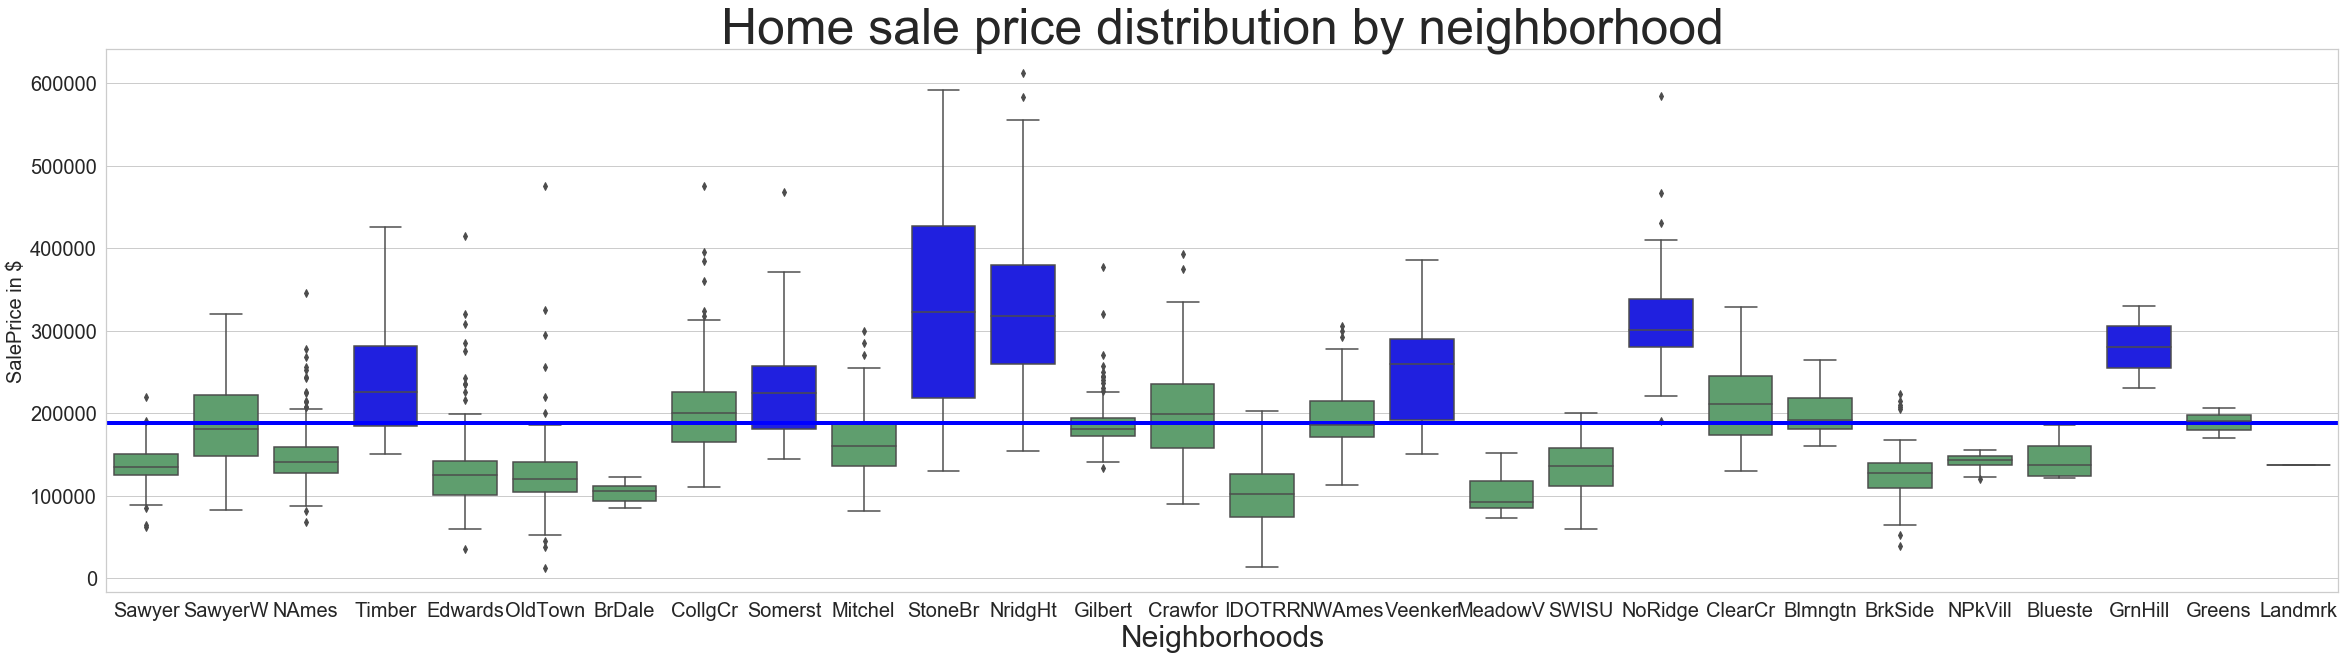

In [74]:
plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
aff_c = 'blue'
low_cost_c ='orange'
my_pal = {'Sawyer' :'g', 'SawyerW' :'g', 'NAmes' :'g' , 'Timber' :aff_c , 'Edwards' :'g' , 
          'OldTown' :'g','BrDale' :'g', 'CollgCr' :'g', 'Somerst' :aff_c, 'Mitchel' :'g', 
          'StoneBr' :aff_c, 'NridgHt':aff_c,'Gilbert' :'g', 'Crawfor' :'g', 'IDOTRR' :'g', 
          'NWAmes' :'g', 'Veenker' :aff_c, 'MeadowV':'g','SWISU' :'g', 'NoRidge' :aff_c, 
          'ClearCr' :'g', 'Blmngtn' :'g', 'BrkSide' :'g', 'NPkVill':'g',
          'Blueste' :'g', 'GrnHill' :aff_c, 'Greens' :'g', 'Landmrk' :'g'} 

b= sns.boxplot(
    data=train_cleaned_df,
    x='Neighborhood',
    y='SalePrice',
    color='green', palette =my_pal);

b.axes.set_title("Home sale price distribution by neighborhood",fontsize=50)
b.set_xlabel("Neighborhoods",fontsize=30)
b.set_ylabel("SalePrice in $",fontsize=20)
b.tick_params(labelsize=20)
b.axes.axhline(188000,ls='-', color ="blue",linewidth=4);

In [75]:
# Do zones have any impact on price of a home

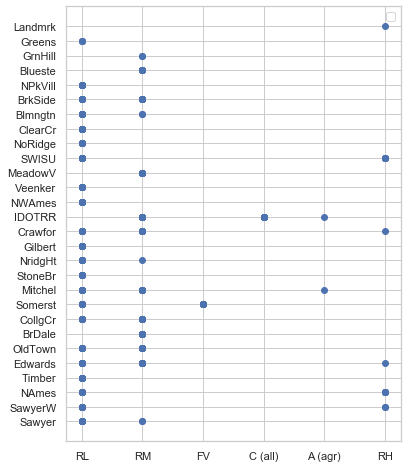

In [76]:
plt.figure(figsize=(6,8))
plt.scatter(train_cleaned_df['MS Zoning'],train_cleaned_df['Neighborhood'])
plt.legend()

Text(0.5, 1.0, 'The houses in  high priced areas are above average sale')

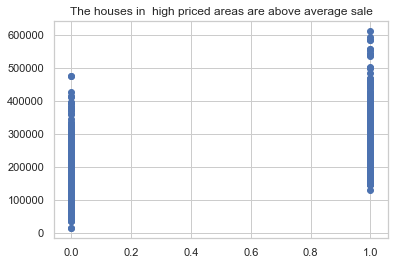

In [77]:
plt.scatter(train_cleaned_df['f_in_affluent_neighborhood'],train_cleaned_df['SalePrice'])
plt.title("The houses in  high priced areas are above average sale")

# Effect of age of a house on its home price?

Text(0.5, 1.0, 'Newer or remodeled houses increase house valuation')

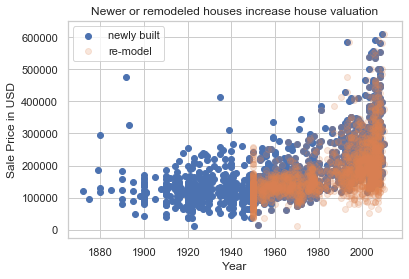

In [78]:
plt.scatter(train_cleaned_df['Year Built'],train_cleaned_df['SalePrice'],label ="newly built")
plt.scatter(train_cleaned_df['Year Remod/Add'],train_cleaned_df['SalePrice'],alpha =0.2,label ="re-model")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sale Price in USD')
plt.title ('Newer or remodeled houses increase house valuation')

### Do newer houses built recently or remodeled are priced at higher rate ?

Text(0.5, 1.0, 'Age of the houses')

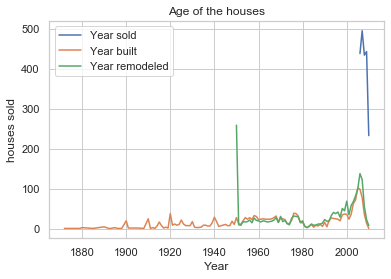

In [79]:
plt.plot(train_cleaned_df['Yr Sold'].value_counts().sort_index(),label ='Year sold')
plt.plot(train_cleaned_df['Year Built'].value_counts().sort_index(),label ='Year built')
plt.plot(train_cleaned_df['Year Remod/Add'].value_counts().sort_index(),label ='Year remodeled')
plt.xlabel('Year')
plt.ylabel('houses sold')
plt.legend()
plt.title("Age of the houses")

In [80]:
###### If a house is remodeled of new - it might increase the value of the home.

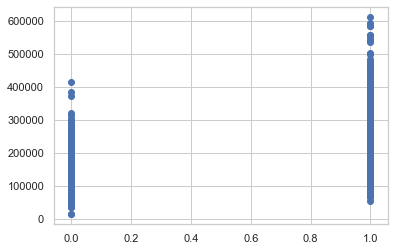

In [81]:
plt.scatter (train_cleaned_df['f_new_or_remodeled'],train_cleaned_df["SalePrice"])

#  Effect of Zoning on  the home price ?

In [82]:
#Looking at the relation between zoining and  home prices I would have expected that home prices
#in commeritial will be higher than residential

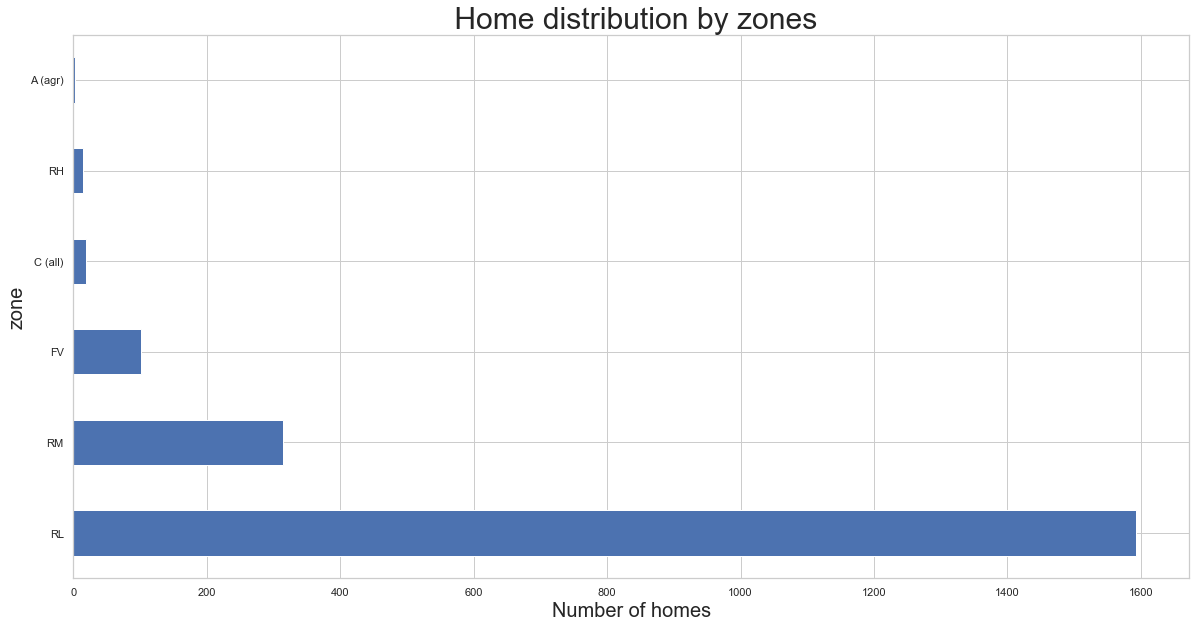

In [83]:
train_cleaned_df['MS Zoning'].value_counts().head(30).plot(kind='barh', figsize=(20,10),sort_columns=False)
plt.xlabel('Number of homes' ,fontsize=20)
plt.ylabel('zone' ,fontsize=20)
plt.title(" Home distribution by zones", fontsize=30);

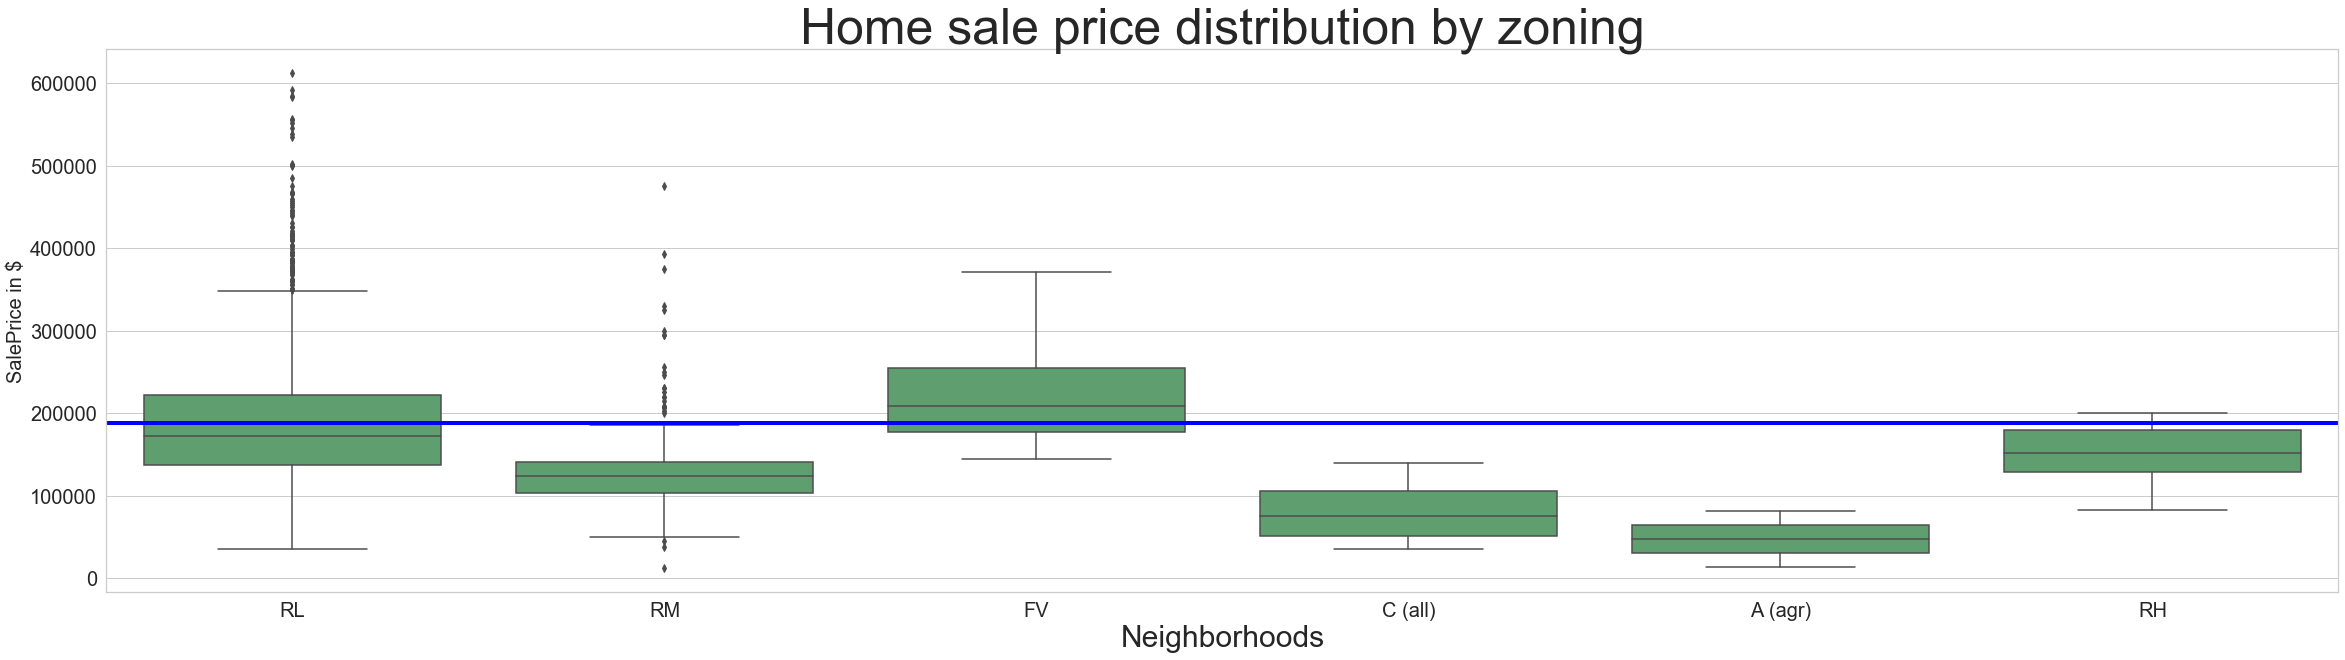

In [84]:
plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
aff_c = 'blue'
low_cost_c ='orange'
my_pal = {'C (all)' :'g', 'FV' :'g', 'RH' :'g' , 'RV' :aff_c , 'RL' :'g' , 
          'I (all)' :'g','RP' :'g', 'RM' :'g','A (agr)':'g'} 

b= sns.boxplot(
    data=train_cleaned_df,
    x='MS Zoning',
    y='SalePrice',
    color='green', palette =my_pal);

b.axes.set_title("Home sale price distribution by zoning",fontsize=50)
b.set_xlabel("Neighborhoods",fontsize=30)
b.set_ylabel("SalePrice in $",fontsize=20)
b.tick_params(labelsize=20)
b.axes.axhline(188000,ls='-', color ="blue",linewidth=4);

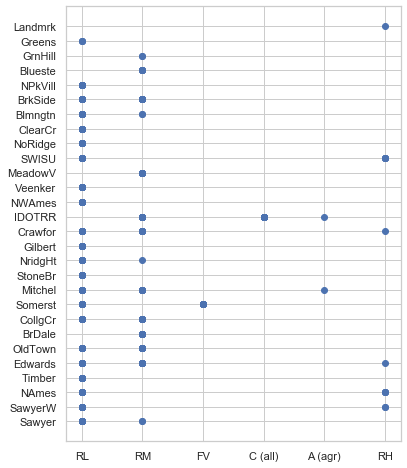

In [85]:
plt.figure(figsize=(6,8))
plt.scatter(train_cleaned_df['MS Zoning'],train_cleaned_df['Neighborhood'])

# Save  data frame with new features and  removed outliers to a file

In [87]:
train_cleaned_df.to_csv("./submission/train_cleaned.csv",index=False)
test_cleaned_df.to_csv("./submission/test_cleaned.csv",index=False)

### References`
https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
https://www.windermere.com/blogs/windermere/posts/how-neighborhood-affects-home-value
https://plot.ly/python/bubble-charts/